In [1]:
import sys
assert sys.version_info

import numpy as np
import cv2 as cv
from util_func import *


## Exercises

Q1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle
these problems). Use "lena.jfif" as the input image.
    
* Use external libraries imutils .

* Modify the transformation matrix


In [2]:
!pip install imutils

In [3]:
import imutils
img = cv.imread("images/lena.jfif")
# Rotate image
dst = imutils.rotate_bound(img, 45)

show_img("rotated", dst)

Q2. Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add
two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a
rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular
region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated
functions are cv.bitwise_and() , cv.bitwise_or() and cv.bitwise_not() . You need to use 
cv.threshold function to segment the flower. Please refer to online documentation for more info. The
result should resemble the following:

In [4]:
# load images
img = cv.imread("images/flower.jfif")
img2 = cv.imread("images/native-bee.png")

# Convert to grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Apply threshold 
_, mask = cv.threshold(gray_img, 70, 255, cv.THRESH_BINARY)
# Get the inverse mask
mask_inv = cv.bitwise_not(mask)

# Extract roi 
roi = img2[0:img.shape[0], 0:img.shape[1]]
# black out roi of bee
new_img2 = cv.bitwise_and(roi, roi, mask=mask_inv)
# get flower
new_img = cv.bitwise_and(img, img, mask=mask)

dst = cv.add(new_img2, new_img)
img2[0:img.shape[0], 0:img.shape[1]] = dst

cv.imshow('ans', img2)
cv.waitKey(0)
cv.destroyAllWindows()


Q3. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':

In [5]:
# Load the image
img = cv.imread("images/native-bee.png")

# 3x3
kernel= np.array([[ 0, -1, 0],
                  [-1,  5, -1],
                  [ 0, -1, 0]])
# 5x5
kernel2 = np.array([[-1, -1, -1, -1, -1],
                    [-1, -1, -1, -1, -1],
                    [-1, -1, 25, -1, -1],
                    [-1, -1, -1, -1, -1],
                    [-1, -1, -1, -1, -1]])

# Apply the sharpening kernels
sharpened_imgx = cv.filter2D(img, -1, kernel)
sharpened_img2x = cv.filter2D(img, -1, kernel2)

cv.imshow("sharpened 3x3", sharpened_imgx)
show_img("sharpened 5x5", sharpened_img2x)

Q4. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on
'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and
deduce the type of noise present on the image. 

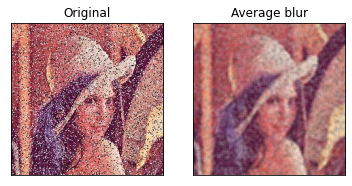

In [11]:
# Load the image
img = cv.imread("images/noise_lena.jpg")

# Apply average filter
av_blur = cv.blur(img, (5, 5))

# Apply Gaussian blur
gaus_blur = cv.GaussianBlur(img, (5, 5), 0)

# Apply median filter
median_blur = cv.medianBlur(img, 5)

# change the images into rgb to plot
imgx = cv.cvtColor(img, cv.COLOR_BGR2RGB)
av_blurx = cv.cvtColor(av_blur, cv.COLOR_BGR2RGB)
gaus_blurx = cv.cvtColor(gaus_blur, cv.COLOR_BGR2RGB)
median_blurx = cv.cvtColor(median_blur, cv.COLOR_BGR2RGB)

# plot and display the original and smoothed images
# Original and average blur
plt.subplot(121), plt_img(imgx, "Original")
plt.subplot(122), plt_img(av_blurx, "Average blur")


plt.show()

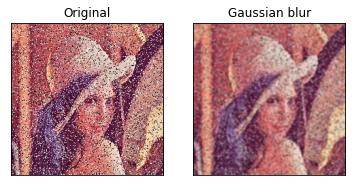

In [12]:
# Original and gaussian blur
plt.subplot(121), plt_img(imgx, "Original")
plt.subplot(122), plt_img(gaus_blurx, "Gaussian blur")

plt.show()

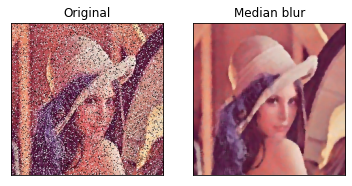

In [13]:
# Original and median blur 
plt.subplot(121), plt_img(imgx, "Original")
plt.subplot(122), plt_img(median_blurx, "Median blur")

plt.show()